# **Non ho niente da dire**
A Data Visualization Project about Hong Kong Extradition Protests.

## Table of Contents
- [1. Project Introduction](#1-project-introduction)
  - [1.1 Background](#11-background)
  - [1.2 Goal](#12-goal)
  - [1.3 Research Questions](#13-research-questions)
- [2. Data Preparation](#2-data-preparation)
  - [2.1 Data Description](#21-data-description)
  - [2.2 Data Cleaning](#22-data-cleaning)
- [3. Data Analysis and Visualization](#3-analysis-and-visualization)


## **1. Project Introduction**:

### 1.1 Background
 •	**Domain**: political and social movements.
 
 •	**Question**: On March 15, 2019, Hong Kong started a series of protests against a proposed amendment to the Fugitive Offenders Ordinance, which would allow extradition to mainland China. 
This sparked longest protest movements in Hong Kong's history, as citizens feared it would undermine the region's autonomy and legal protections by allowing extraditions to mainland China. 
The protests lacked a specific end date, but for this analysis, I take June 30, 2020, the date when the Hong Kong national security law (was created in response to the extraditon protests) was enacted, as the conclusion of this period. 
The failure of these protests marked a significant moment, symbolizing the downfall of Hong Kong’s autonomy.

 
### 1.2 Goal
My goal is to compare the extradition protests with other protests in Hong Kong, figure out the unique features of the extradition protests. I also want this project to be seen as a comprehensive archive to record the scale, scope, and impact of the 20169-2020 protests. 

### 1.3 Research Questions
 <ol>
  <li> <strong>How</strong> do the extradition protests <strong>compare</strong> to other protests during <strong>the same period</strong>?</li>
  <li> <strong>Where</strong> were the protests <strong>geographically</strong> concentrated?</li> 
  <li> <strong>What</strong> were the <strong>major</strong> events associated with the extradition protests?</li> 
  <li> <strong>What</strong> are the common themes or keywords in the event notes and tags?</li> 
</ol>


## **2.Data Preparation**:

### 2.1 Data Description

The datasets are from WikiData and ACLED.<br>

**ACLED Dataset**: The ACLED (Armed Conflict Location & Event Data) dataset is a comprehensive collection of data on political violence and protest events in the world. For this project, I used ACLED's data export tool to obtain data specific to China from March 15, 2019, to June 30, 2020. 

**WikiData Dataset**: WikiData is a linked open data platform that provides structured data to support Wikipedia and other Wikimedia projects. For this project, I queried WikiData to extract information on specific protest events in Hong Kong from March 15, 2019, to June 30, 2020, since it only has data of big events related to the extradition protests.

### 2.2 Data Cleaning
#### 2.2.1 ACLED Dataset

In this step, what i did are:<br/>
 •	Filtered the dataset to only include protests happened in Hong Kong.<br/>
 •	Converted the time format to numeral for filters.<br/>
 •	Checked missing values, removed irrelevant, and repetitive columns. and filled in ones are useful to the project.<br/>
 •	Converted values in location to a standardised format. 

   The reasons that why I removed those columns:<br/>
   •	*actor2* and *assoc_actor_2*:  These columns have a significant amount of missing values and are not critical for my analysis.<br/>
   •	*civilian_targeting*:  This column contains only 26 entries, describing individual attacks, which are not the focus of this project. <br/>
   •	*admin2*:  The values in this column are redundant as they are the same as those in the *location* column.<br/>
   •  *admin3*:  This column represents more specific locations names but has about 2/3 of its values missing, and i can use *latitude* and *longitude* to achieve the same effect.

In [440]:
# ACLED Dataset
import pandas as pd
df_protests_2019_2020 = pd.read_csv("data/2019-03-15-2020-06-30-East_Asia-China.csv" )

# Filter data for Hong Kong
df_hk_2019_2020 = df_protests_2019_2020[df_protests_2019_2020['location'].str.contains('Hong Kong', case=False, na=False)]

# Convert the date column as numeral format
df_hk_2019_2020['event_date'] = pd.to_datetime(df_hk_2019_2020['event_date'], format='%d %B %Y', errors='coerce')


# Remove irrelevant columns
df_hk_2019_2020_cleaned = df_hk_2019_2020.drop(columns=['actor2', 'assoc_actor_2', 'civilian_targeting', 'admin2', 'admin3'])


# Function to standardise the 'location' column
def stand_location(location):
    if pd.isnull(location) or location.strip().lower() == 'hong kong': #since we have this in admin1
        return 'unknown'
    else:
        # Split the string and return the administrative region part
        parts = location.split('-')
        if len(parts) > 1:
            return parts[1].strip()
        else:
            return 'unknown'

df_hk_2019_2020_cleaned['location'] = df_hk_2019_2020_cleaned['location'].apply(stand_location)

#check the result
#print(df_hk_2019_2020_cleaned.info())
#print(df_hk_2019_2020_cleaned.head(10))

C:\Users\ge75\AppData\Local\Temp\ipykernel_9312\1471755338.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hk_2019_2020['event_date'] = pd.to_datetime(df_hk_2019_2020['event_date'], format='%d %B %Y', errors='coerce')


For answering the main question, i need to distinguish events related to Extradition Protests  from those that are not. **the five demands** is the battle cry of the whole protests, after viewing the dataset, i discovered that **five demands moment** is also a common value in *assoc_actor_1* so i used it with searching specific keywords in *notes* to create a new column to achieve the aim. 

In [441]:
# Create a new column 'related_ep' 
def if_five_demands_movement(row):
    keywords = [ "Extradition Bill", "Five Demands"]
    assoc_actor = str(row['assoc_actor_1']) if not pd.isnull(row['assoc_actor_1']) else ""
    notes = str(row['notes'])

    if 'Five Demands Movement' in assoc_actor or any(keyword in notes for keyword in keywords): 
        return 'yes'
    elif pd.isnull(row['assoc_actor_1']):  #assoc_actor has a missing value and no keywords were found in notes
        return 'unknown'
    else:
        return 'no' #assoc_actor has a different value and no keywords were found in notes
    
df_hk_2019_2020_cleaned['related_ep'] = df_hk_2019_2020_cleaned.apply(if_five_demands_movement, axis=1)

# Fill missing values in 'assoc_actor_1' with 'Unknown'
df_hk_2019_2020_cleaned['assoc_actor_1'].fillna('Unknown', inplace=True)


# Check the result
#df_hk_2019_2020_cleaned[['assoc_actor_1','related_ep','notes']]

C:\Users\ge75\AppData\Local\Temp\ipykernel_9312\538324292.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_hk_2019_2020_cleaned['assoc_actor_1'].fillna('Unknown', inplace=True)


I reviewed the CSV file to understand the meanings of the event types and sub-event types.Under the *Riots* category, there are *Violent demonstration* and *Mob violence*. Since this project focuses on group actions, and *Mob violence* events are typically anonymous with unclear intentions and involve only a few individuals, I decided to remove these events from the analysis.

In [444]:
#check events_type
unique_event_types = df_hk_2019_2020_cleaned['event_type'].unique()
unique_sub_event_types = df_hk_2019_2020_cleaned['sub_event_type'].unique()
#print("Unique event types: ")
#print(unique_event_types)
#print("unique sub event types: ")
#print(unique_sub_event_types)

hk_protests_type_cleaned = df_hk_2019_2020_cleaned[
     (df_hk_2019_2020_cleaned['event_type'] == 'Protests') |
    ((df_hk_2019_2020_cleaned['event_type'] == 'Riots') & (df_hk_2019_2020_cleaned['sub_event_type'] == 'Violent demonstration'))
]


#print(hk_protests_type_cleaned.info())
#print(hk_protests_ACLED.head(10))

# Save the cleaned dataset to a new CSV file
hk_protests_type_cleaned.to_csv("data/hk_protests_ACLED.csv", index=False)


#### 2.2.2 LOD Dataset

For the LOD dataset, I queried data from Wikidata using SPARQL, then processed it into an RDF graph, converted it into a CSVfile for further use. 

In [445]:
# LOD Dataset RDF
from SPARQLWrapper import SPARQLWrapper, JSON

from rdflib import Graph, Literal, RDF, URIRef, Namespace
from rdflib.namespace import RDF, XSD

# Get the wikidata endpoint
wikidata_sparql = SPARQLWrapper("https://query.wikidata.org/sparql")

# Prepare the query
wikidata_sparql.setQuery("""
SELECT ?event ?eventLabel ?relatedEntity ?relatedEntityLabel WHERE {
  ?event wdt:P361 wd:Q64509602.    # Part of 2019–2020 Hong Kong protests
  ?event ?relation ?relatedEntity. # Any relation to another entity
  ?relatedEntity wdt:P31 ?type.    # Ensure it's an entity
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
LIMIT 100
""")

#return format and get the result
wikidata_sparql.setReturnFormat(JSON)
wikidata_results = wikidata_sparql.query().convert()

#Create an RDF graph
g = Graph()

#Define namespaces
WIKIDATA = Namespace("http://www.wikidata.org/entity/")
SCHEMA = Namespace("http://schema.org/")

# Bind namespaces to prefixes
g.bind("wd", WIKIDATA)
g.bind("schema", SCHEMA)

# Process the SPARQL results and add to RDF graph
rdf_events = wikidata_results["results"]["bindings"]
for event in rdf_events:
    event_uri = URIRef(event['event']['value'])
    event_label = Literal(event['eventLabel']['value'], datatype=XSD.string)
    g.add((event_uri, SCHEMA.name, event_label))
    if 'relatedEntity' in event:
        related_entity_uri = URIRef(event['relatedEntity']['value'])
        related_entity_label = Literal(event['relatedEntityLabel']['value'], datatype=XSD.string)
        g.add((event_uri, SCHEMA.relatedEntity, related_entity_uri))
        g.add((related_entity_uri, SCHEMA.name, related_entity_label))

#check how many data were fetched
#print("Number of events fetched: {len(rdf_events)}")

# the RDF graph to Turtle format
rdf_data = g.serialize(format="turtle")
#print(rdf_data)

In [431]:
#Convert the RDF data to DataFrame
wikidata_event_data = [
    {
        "Event": str(event['eventLabel']['value']),
        "RelatedEntity": str(event['relatedEntityLabel']['value']) if 'relatedEntityLabel' in event else None
    }
    for event in rdf_events
]


wikidata_events_df  = pd.DataFrame(wikidata_event_data)
#print(wikidata_events_df.head())

# Save the DataFrame to a CSV file
wikidata_events_df.to_csv('data/hk_protests_wikidata.csv', index=False)


                                               Event  \
0             July 2019 Restoration of Tuen Mun Park   
1  7 July 2019 Hong Kong anti-extradition bill pr...   
2  31 March 2019 Hong Kong anti-extradition bill ...   
3             July 2019 Restoration of Tuen Mun Park   
4  7 July 2019 Hong Kong anti-extradition bill pr...   

                RelatedEntity  
0  People's Republic of China  
1  People's Republic of China  
2  People's Republic of China  
3  People's Republic of China  
4  People's Republic of China  


#### 2.2.3 Integration

In [447]:

# Load datasets
df_acled = pd.read_csv('data/hk_protests_ACLED.csv')
df_wikidata = pd.read_csv('data/hk_protests_wikidata.csv')

# Print column names and data types
print(df_acled.dtypes)
print(df_wikidata.dtypes)

# Convert date columns to datetime format
df_acled['event_date'] = pd.to_datetime(df_acled['event_date'])
df_wikidata['Date'] = pd.to_datetime(df_wikidata['Date'])

df_acled['event_date'] = pd.to_datetime(df_acled['event_date'])

# Ensure both Date columns are in the same format
df_wikidata['Date'] = pd.to_datetime(df_wikidata['Date']).dt.tz_localize(None)  # Remove timezone info if necessary
df_acled['event_date'] = df_acled['event_date'].dt.tz_localize(None)  # Remove timezone info if necessary

# Standardize location data
df_acled['location'] = df_acled['location'].str.lower().str.strip()
df_wikidata['Location'] = df_wikidata['Location'].str.lower().str.strip()

# Display data types to confirm changes
print(df_acled.dtypes)
print(df_wikidata.dtypes)



event_id_cnty      object
event_date         object
year                int64
time_precision      int64
disorder_type      object
event_type         object
sub_event_type     object
actor1             object
assoc_actor_1      object
inter1              int64
inter2              int64
interaction         int64
iso                 int64
region             object
country            object
admin1             object
location           object
latitude          float64
longitude         float64
geo_precision       int64
source             object
source_scale       object
notes              object
fatalities          int64
tags               object
timestamp           int64
related_ep         object
dtype: object
Event            object
RelatedEntity    object
dtype: object


KeyError: 'Date'

## **2.Exploratory Data Analysis (EDA)**:

What are the unique characteristics of the anti-extradition protests compared to other types of protests during the same period?

## **3.Data Analysis and Visualization**:

In [434]:
# Load ACLED dataset
df_acled = pd.read_csv('data/hk_protests_ACLED.csv')
df_ep = df_acled[df_acled['related_ep'] == 'yes']
df_non_ep = df_acled[df_acled['related_ep'] == 'no']

ep_types = df_ep['event_type'].value_counts()
non_ep_types = df_non_ep['event_type'].value_counts()

print(ep_types)
print(non_ep_types)


event_type
Protests    414
Riots       189
Name: count, dtype: int64
event_type
Protests    927
Riots       143
Name: count, dtype: int64


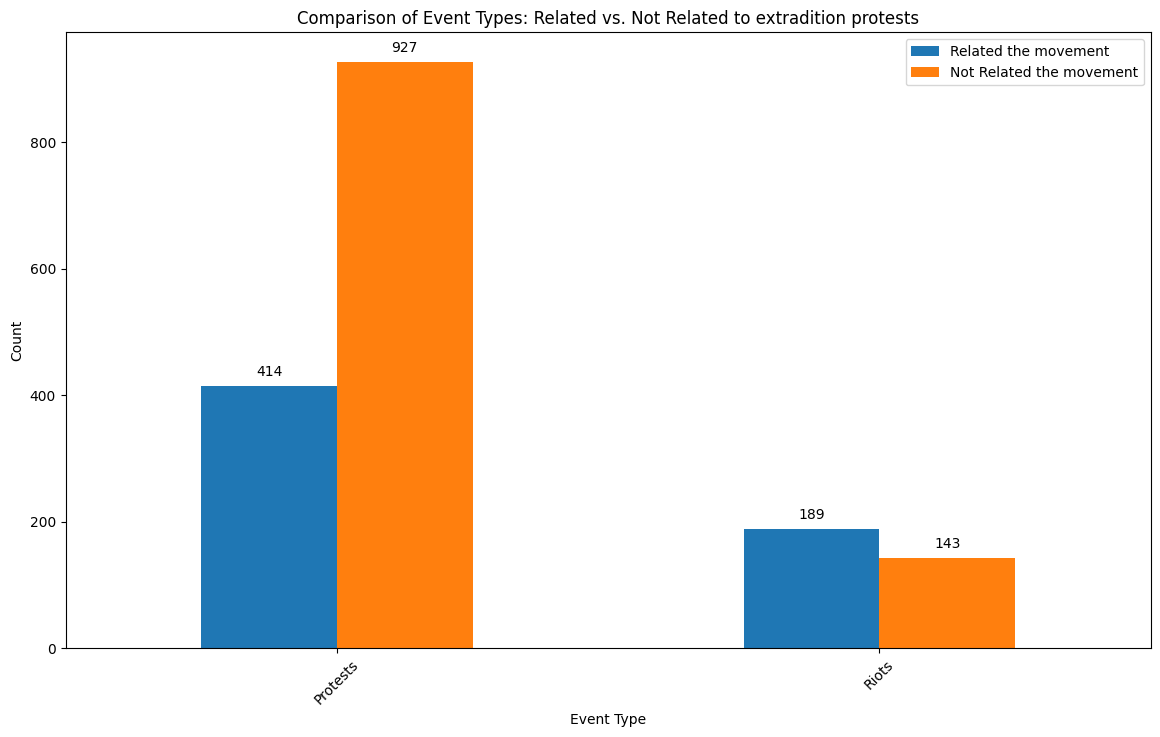

In [435]:
import matplotlib.pyplot as plt

# Create a DataFrame for comparison
df_types_comparison = pd.DataFrame({
    'Related the movement': ep_types,
    'Not Related the movement': non_ep_types
}).fillna(0)

# Plot the comparison and capture the axis
ax = df_types_comparison.plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of Event Types: Related vs. Not Related to extradition protests')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add data labels
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend(['Related the movement', 'Not Related the movement'])
plt.show()

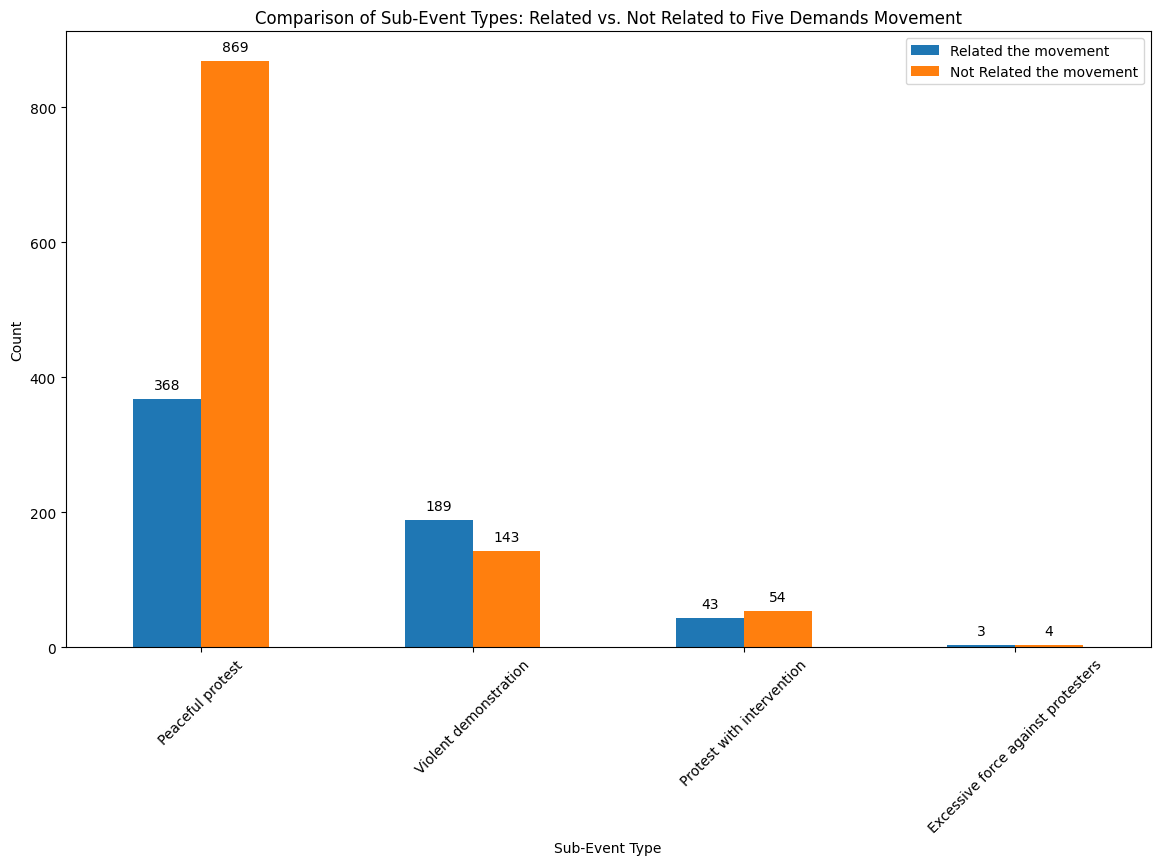

In [436]:
ep_sub_event_types = df_ep['sub_event_type'].value_counts()
non_ep_sub_event_types = df_non_ep['sub_event_type'].value_counts()

# Create a DataFrame for comparison
df_sub_types_comparison = pd.DataFrame({
    'Related the movement': ep_sub_event_types,
    'Not Related the movement': non_ep_sub_event_types
}).fillna(0)

# Plot the stacked bar chart
ax = df_sub_types_comparison.plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of Sub-Event Types: Related vs. Not Related to Five Demands Movement')
plt.xlabel('Sub-Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add data labels
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend(['Related the movement', 'Not Related the movement'])
plt.show()

In [448]:
#Temporal Analysis

# Set the index to event_date
df_ep.set_index('event_date', inplace=True)
df_non_ep.set_index('event_date', inplace=True)

# Aggregate data by week
related_weekly = df_non_ep.resample('W').size()
not_related_weekly = df_non_ep.resample('W').size()

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(related_weekly.index, related_weekly.values, marker='o', linestyle='-', label='Related to the Movement')
plt.plot(not_related_weekly.index, not_related_weekly.values, marker='x', linestyle='-', label='Not Related to the  Movement')

plt.title('Timeline of Protests: Related vs. Not Related to the Movement')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: "None of ['event_date'] are in the columns"

What were the key dates and events during the protests?

1Where were the main protest locations in Hong Kong?

In order to answer the question of 

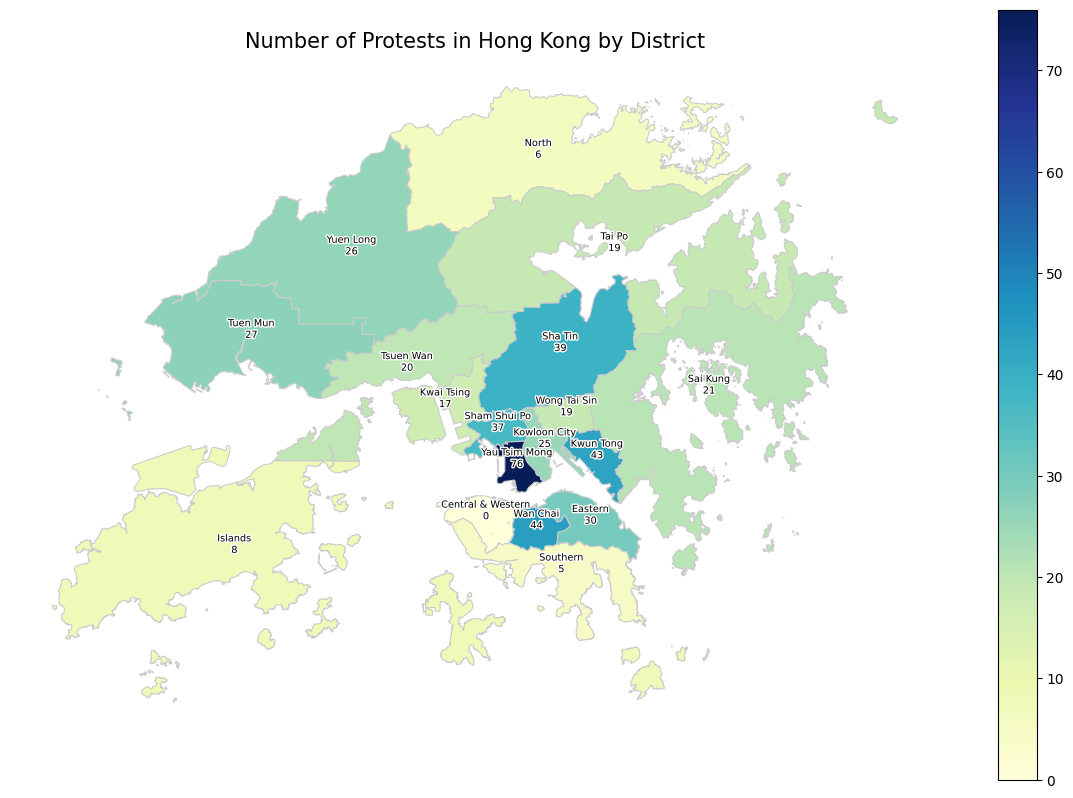

In [366]:
#pip install folium geopandas
import geopandas as gpd
import matplotlib.patheffects as PathEffects

# Load a GeoJSON file for Hong Kong administrative regions 
geojson_path = 'Hong_Kong_18_Districts.geojson'  
geo_data = gpd.read_file(geojson_path)

geo_data['ENAME'] = geo_data['ENAME'].str.title()

# Aggregate the number of protests by administrative regions
protest_counts = df_fd_movement['location'].value_counts().reset_index()
protest_counts.columns = ['location', 'count']

# Merge protest data with GeoJSON data
geo_data = geo_data.rename(columns={"ENAME": "location"})
merged = geo_data.set_index('location').join(protest_counts.set_index('location'))

# Fill NaN values with 0 for districts with no protests
merged['count'] = merged['count'].fillna(0)

# Plot the choropleth map using geopandas
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='count', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add a title
plt.title('Number of Protests in Hong Kong by District', fontsize=15)

# Add interactive popups
for idx, row in merged.iterrows():
    text = plt.text(row.geometry.centroid.x, row.geometry.centroid.y, 
             f"{row.name}\n{int(row['count'])}", 
             horizontalalignment='center', fontsize=7, color='black')
    text.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='white')])

# Remove axis
ax.set_axis_off()

# Save the plot as an image file
plt.savefig('hk_protests_choropleth_map.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [393]:
import geopandas as gpd
from folium.plugins import TimestampedGeoJson

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    df_acled, geometry=gpd.points_from_xy(df_acled.longitude, df_acled.latitude)
)

# Prepare data for the animated map
features = []
for _, row in gdf.iterrows():
    feature = {
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': [row['longitude'], row['latitude']],
        },
        'properties': {
            'time': row['event_date'].strftime('%Y-%m-%d'),
            'popup': row['event_type'] + ": " + row['notes'],
            'icon': 'circle',
            'iconstyle': {
                'fillColor': 'red',
                'fillOpacity': 0.6,
                'stroke': 'true',
                'radius': 5
            }
        }
    }
    features.append(feature)

geojson = {
    'type': 'FeatureCollection',
    'features': features
}

# Initialize the map
map_center = [22.3193, 114.1694]
m = folium.Map(location=map_center, zoom_start=11)

# Add the Timestamped GeoJson
TimestampedGeoJson(
    geojson,
    transition_time=200,
    period='P1W',
    add_last_point=True,
    auto_play=True,
    loop=False,
    max_speed=1,
    loop_button=True,
    date_options='YYYY/MM/DD',
    time_slider_drag_update=True,
).add_to(m)

# Save and display the map
m.save('hk_protests_animated_map.html')

word cloud


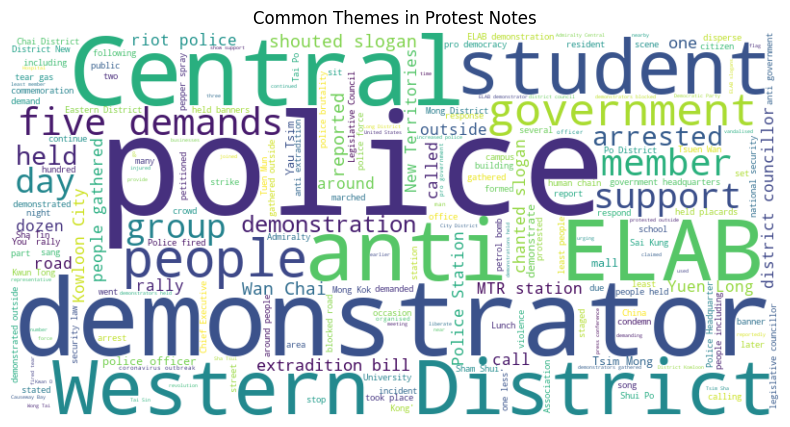

In [371]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all the notes into a single string
text = " ".join(note for note in df_acled.notes.dropna())

# Define stop words
stopwords = set(STOPWORDS)
stopwords.update(["hong", "kong", "protest", "protests", "protester", "protesters", "event", "events","january", "february", "march", "april", "may", "june", "july", "august", "september",
    "october", "november", "december"])

# Generate word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Themes in Protest Notes")
plt.show()


1.	i want to use LOD to describe the background and connection, like : what things related to those series of protests, 涉及的关键组织和个人还有历史事件

In [376]:
import json

with open('query.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Convert JSON data to DataFrame
events_data = []
for item in data:
    events_data.append({
        'Event': item.get('event'),
        'Event Label': item.get('eventLabel'),
        'Related Entity': item.get('relatedEntity'),
        'Related Entity Label': item.get('relatedEntityLabel')
    })

df_events = pd.DataFrame(events_data)
print(df_events.head())


                                      Event  \
0  http://www.wikidata.org/entity/Q64576952   
1  http://www.wikidata.org/entity/Q64577033   
2  http://www.wikidata.org/entity/Q64620775   
3  http://www.wikidata.org/entity/Q64576952   
4  http://www.wikidata.org/entity/Q64577033   

                                         Event Label  \
0  12 June 2019 demonstration against extradition...   
1  6 June 2019 demonstration against extradition ...   
2  16 June 2019 Hong Kong anti-extradition bill p...   
3  12 June 2019 demonstration against extradition...   
4  6 June 2019 demonstration against extradition ...   

                        Related Entity        Related Entity Label  
0  http://www.wikidata.org/entity/Q148  People's Republic of China  
1  http://www.wikidata.org/entity/Q148  People's Republic of China  
2  http://www.wikidata.org/entity/Q148  People's Republic of China  
3  http://www.wikidata.org/entity/Q148  People's Republic of China  
4  http://www.wikidata.org/entity/Q

Event                   0
Event Label             0
Related Entity          0
Related Entity Label    0
dtype: int64


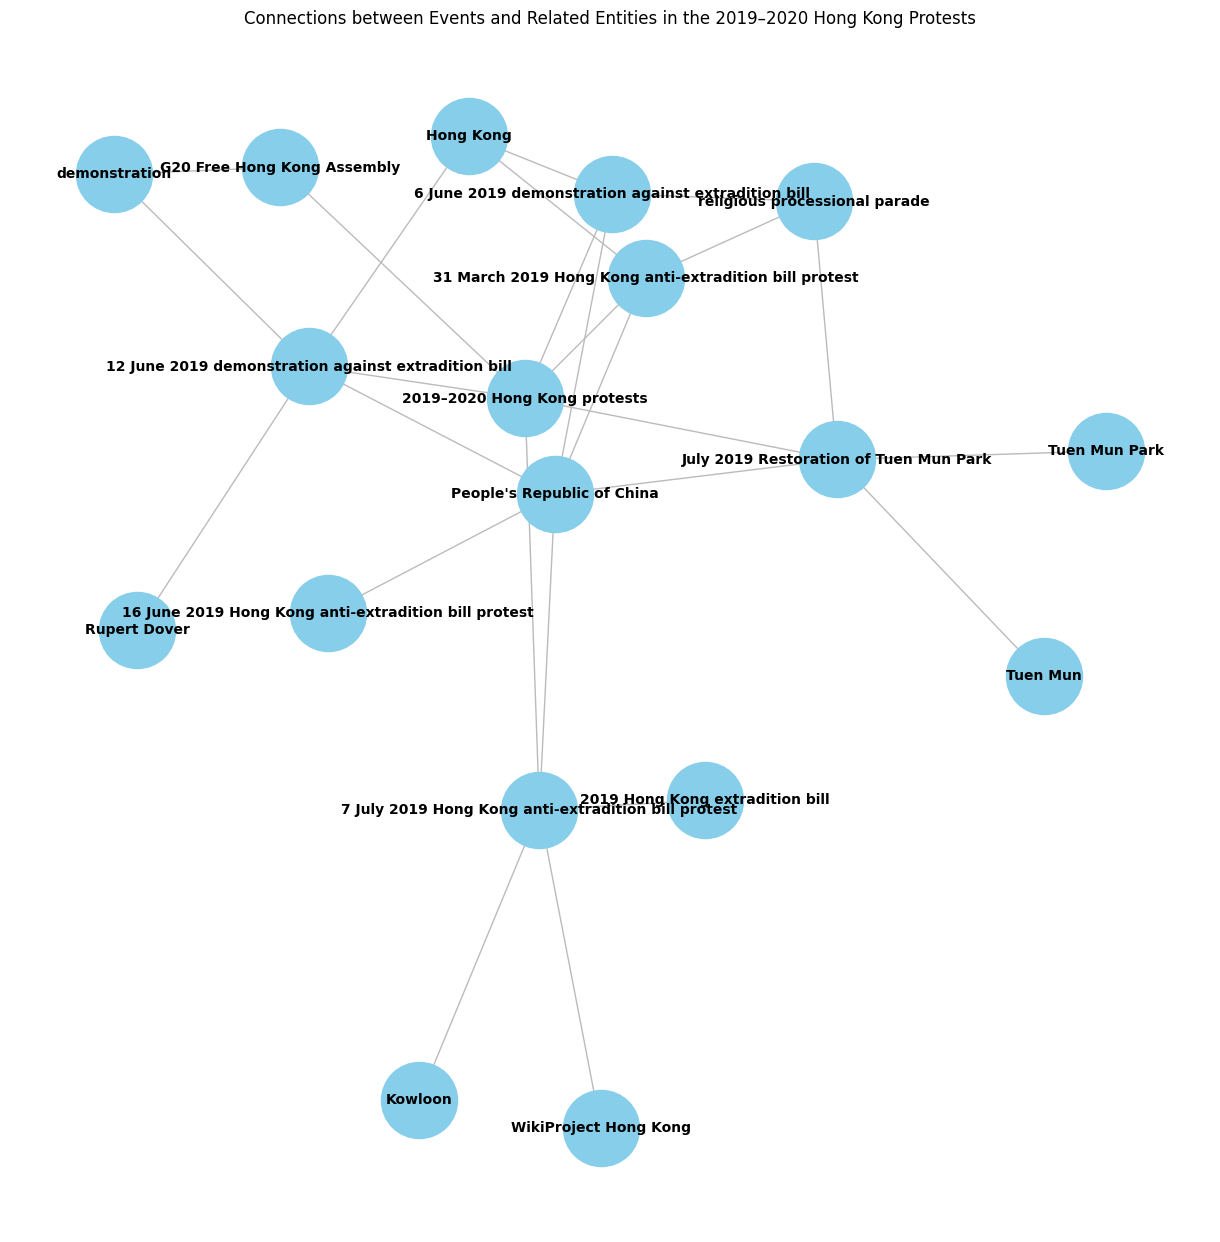

In [379]:
# Check for missing values
print(df_events.isnull().sum())

# Fill or drop missing values as needed
df_events.fillna('Unknown', inplace=True)

import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes and edges for events and related entities
for _, row in df_events.iterrows():
    G.add_node(row['Event Label'], type='Event')
    if row['Related Entity Label'] != 'Unknown':
        G.add_node(row['Related Entity Label'], type='Related Entity')
        G.add_edge(row['Event Label'], row['Related Entity Label'])

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="#BBBBBB")
plt.title("Connections between Events and Related Entities in the 2019–2020 Hong Kong Protests")
plt.show()

                                          Event Label  \
0   12 June 2019 demonstration against extradition...   
1   6 June 2019 demonstration against extradition ...   
2   16 June 2019 Hong Kong anti-extradition bill p...   
27  12 June 2019 demonstration against extradition...   
28  6 June 2019 demonstration against extradition ...   
45  12 June 2019 demonstration against extradition...   
46  6 June 2019 demonstration against extradition ...   
47  12 June 2019 demonstration against extradition...   
48  6 June 2019 demonstration against extradition ...   
51  12 June 2019 demonstration against extradition...   
52             July 2019 Restoration of Tuen Mun Park   
53  7 July 2019 Hong Kong anti-extradition bill pr...   
54  31 March 2019 Hong Kong anti-extradition bill ...   
79  31 March 2019 Hong Kong anti-extradition bill ...   
88                        G20 Free Hong Kong Assembly   
89  7 July 2019 Hong Kong anti-extradition bill pr...   
90             July 2019 Restor

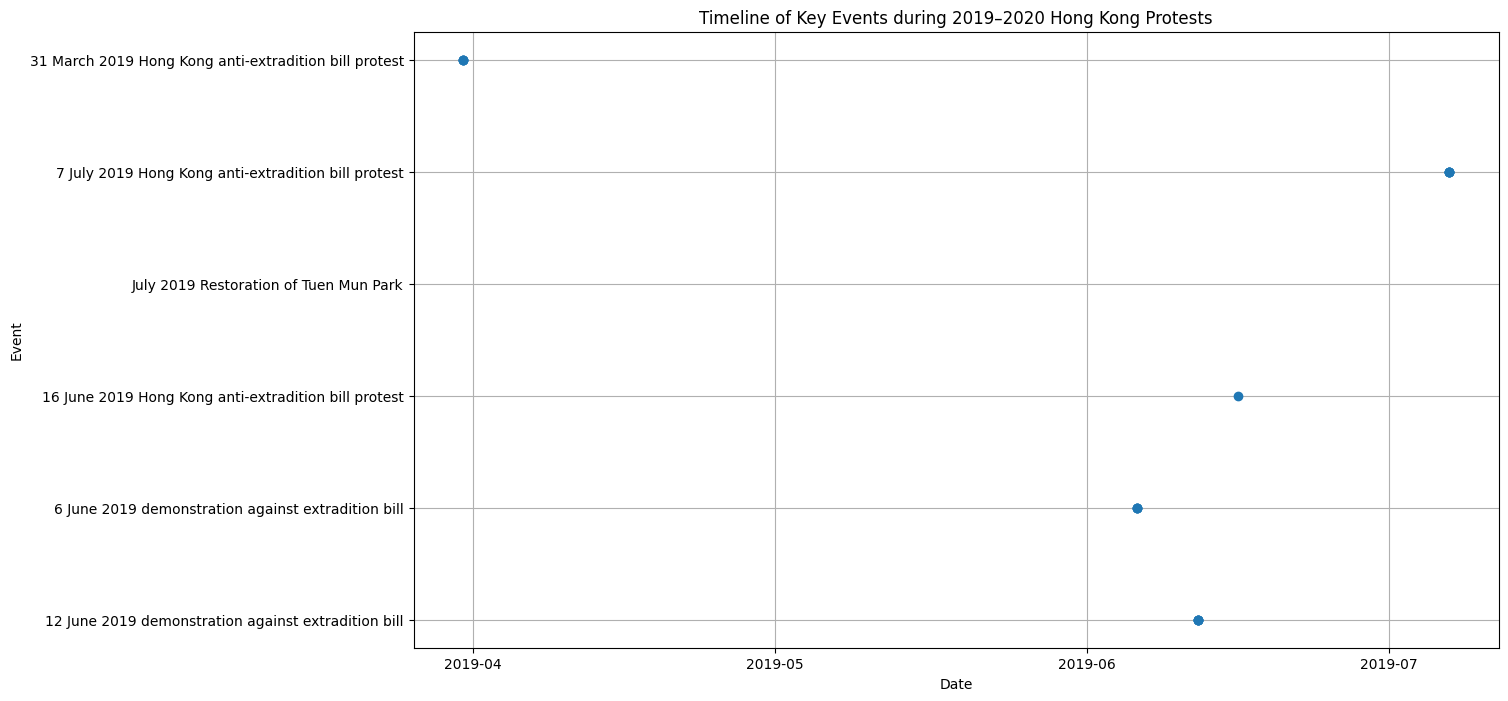

In [380]:
# Extract unique events and their labels
unique_events = df_events[['Event Label', 'Related Entity Label']].drop_duplicates()
print(unique_events)

# Plot the key events on a timeline (example using matplotlib)
import matplotlib.dates as mdates

# Convert dates to datetime format if applicable
# Assuming the Event Label contains dates, you may need to parse them appropriately
df_events['Event Date'] = pd.to_datetime(df_events['Event Label'].str.extract(r'(\d{1,2} \w+ \d{4})')[0], errors='coerce')

# Plot timeline
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(df_events['Event Date'], df_events['Event Label'], 'o')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('Timeline of Key Events during 2019–2020 Hong Kong Protests')
plt.xlabel('Date')
plt.ylabel('Event')
plt.grid(True)
plt.show()